# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

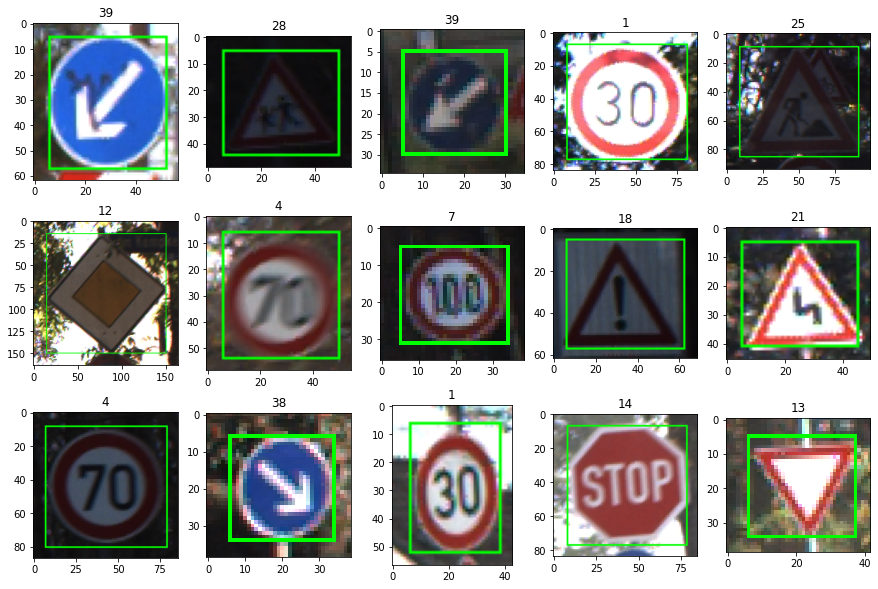

In [14]:
# Load the training labels
root = 'D:/tmp/GTSRB' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = 39209

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    sample = data.iloc[idx]
    img = cv2.imread(os.path.join(root, sample['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    cv2.rectangle(img, (sample['Roi.X1'], sample['Roi.Y1']), (sample['Roi.X2'], sample['Roi.Y2']), (0, 255, 0), 1)

    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(sample['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [22]:
# Extract class identifiers
# Hint: Check the csv 
ids = data['ClassId']

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

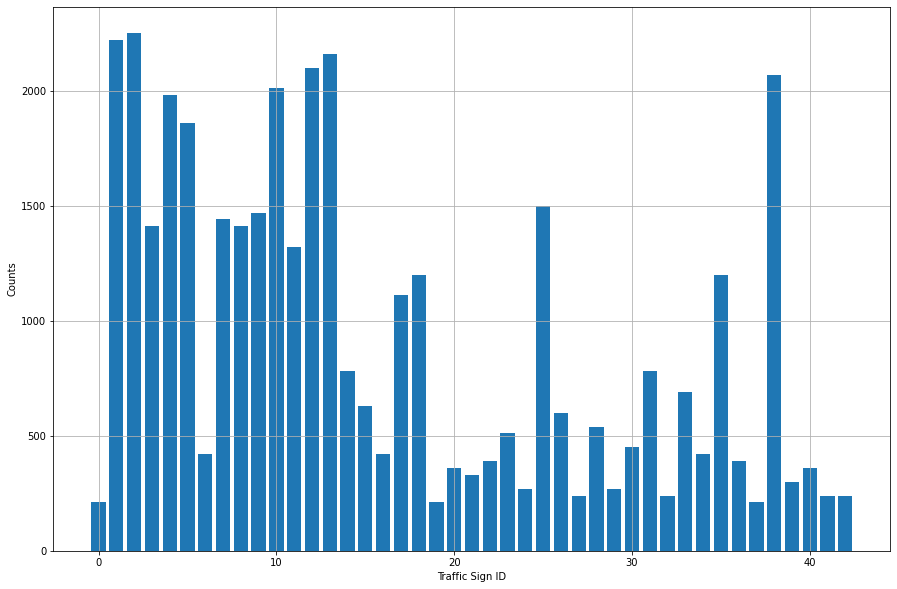

In [4]:
from collections import Counter
hist = Counter(ids)

plt.bar( hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

In [5]:
values = hist.values()
keys = hist.keys()

under_represeneted_threshold = 300
over_represented_threshold = 1500
under_represeneted = []
over_represented = []

for i in range(0, len(values)):
    key = list(keys)[i]
    value = list(values)[i]
    if value < under_represeneted_threshold:
        under_represeneted.append(key)

    if value > over_represented_threshold:
        over_represented.append(key)

print('underrepreseneted classes:', under_represeneted)
print('overrepresented classes:', over_represented)

underrepreseneted classes: [0, 19, 24, 27, 29, 32, 37, 41, 42]
overrepresented classes: [1, 2, 4, 5, 10, 12, 13, 38]


### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?

    No, looks like this data set is not balanced, because there are classes that differ in more than 5 times in each another. Also all images has different sizes and quality.

* Are there any classes that are (significantly) over-represented or under-represeneted?

    There are 9 underrepresented classes and 8 overrepresented classes

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

In [15]:
data['Size'] = data.apply(lambda x: x['Width'] * x['Height'], axis=1)
data['Ratio'] = data['Width'] / data['Height']
print('Total sizes:', len(data['Size'].unique()))

Total sizes: 2034


(<BarContainer object of 100 artists>, None)

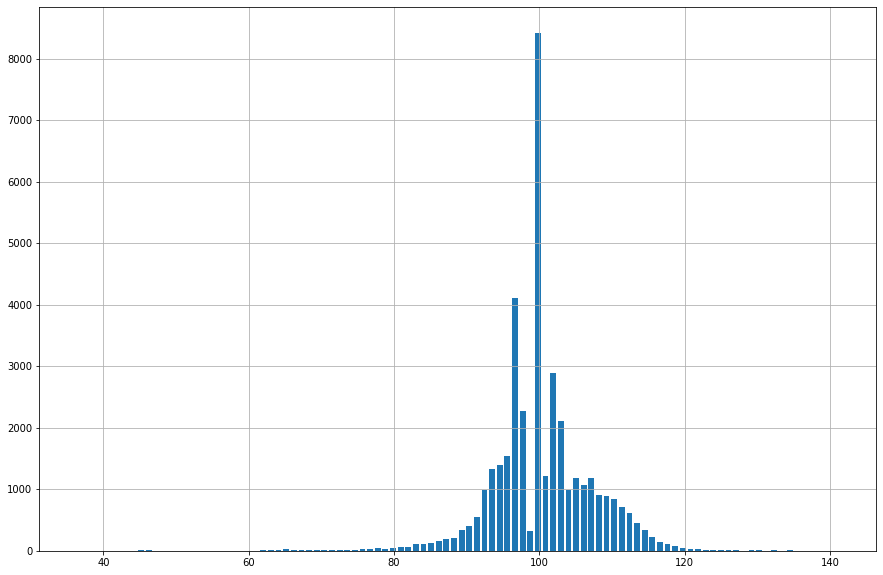

In [31]:
count, bins = np.histogram((data['Ratio'] * 100), bins=100)
plt.bar(bins[0:-1], count), plt.grid(True)

In [23]:
import plotly.graph_objects as go

df_size = data.groupby(['Width', 'Height'], as_index=False).size()
fig = go.Figure(data=go.Heatmap(z=df_size['size'], x=df_size['Width'], y=df_size['Height']))
fig.update_layout(margin=dict(t=30,r=30,b=30,l=30), width=500, height=400)
fig.show()

There are huge range of samples sizes and their ratios. Looks like there a lot of work to make some standardizing to prepare this data to train neural network.

In [36]:
from tqdm import tqdm

images = []
for f in tqdm(data['Path']):
    img = cv2.imread(os.path.join(root, f))
    images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    

100%|██████████| 39209/39209 [00:17<00:00, 2222.96it/s]


(<BarContainer object of 255 artists>, None)

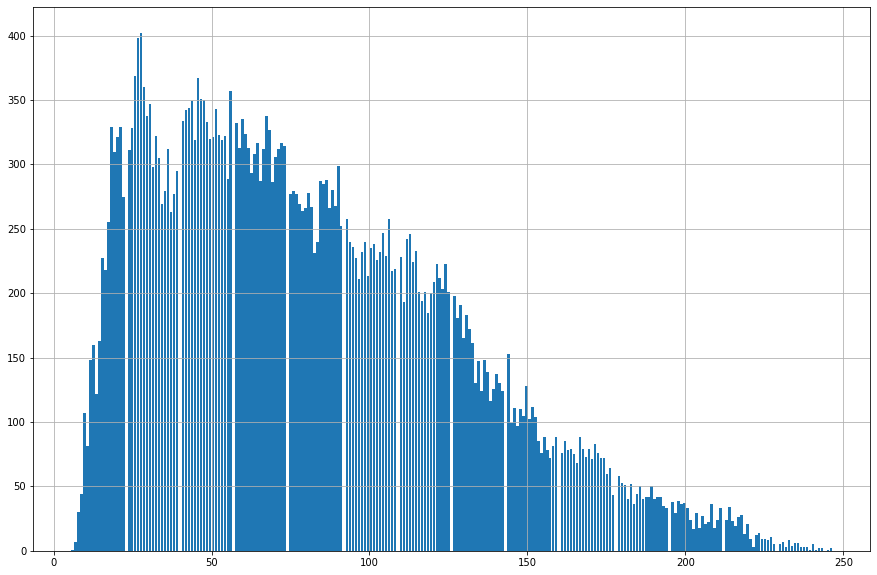

In [42]:
nimages = np.array(images, dtype='object') / 255
brightness = [int(np.mean(i)*255) for i in nimages]
count, bins = np.histogram(brightness, bins=255,)
plt.bar(bins[0:-1], count), plt.grid(True)

Brightness of images also has a huge range in distribution and we also need to normalize it to use this data for train out networks.